In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

In [ ]:
df = pd.read_csv("/content/Drive/MyDrive/context awareness datasets/shipment tracking dataset/data.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:

sizes = df['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


([<matplotlib.patches.Wedge at 0x7f22e4655dd0>,
 [Text(-0.3290237775458344, 1.0496396304491695, ''),
  Text(0.3290237775458339, -1.0496396304491697, '')],
 [Text(-0.17946751502500058, 0.5725307075177288, '59.7%'),
  Text(0.17946751502500027, -0.5725307075177289, '40.3%')])

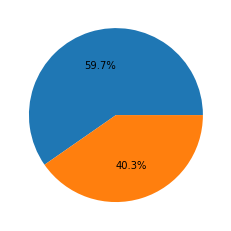

In [ ]:
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.drop(['ID'], axis=1, inplace=True)

df.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
5,F,Flight,3,1,162,3,medium,F,12,1417,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
7,F,Flight,4,1,233,2,low,F,48,2804,1
8,A,Flight,3,4,150,3,low,F,11,1861,1
9,B,Flight,3,2,164,3,medium,F,29,1187,1


In [ ]:
df_reached = df[df['Reached.on.Time_Y.N'] == 0]
df_not_reached = df[df['Reached.on.Time_Y.N'] == 1]

In [ ]:
df_reached_downsampled = resample(df_reached,replace=False,n_samples=4000,random_state=25) 
df_not_reached_downsampled = resample(df_not_reached,replace=False,n_samples=4000,random_state=25) 

In [ ]:
df_downsampled = pd.concat([df_not_reached_downsampled,df_reached_downsampled])
print(len(df_downsampled))

8000


1    4000
0    4000
Name: Reached.on.Time_Y.N, dtype: int64


([<matplotlib.patches.Wedge at 0x7f22e3be1a90>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

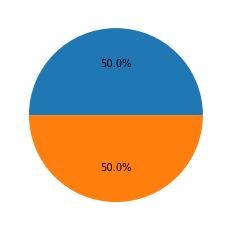

In [ ]:

sizes = df_downsampled['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
df_downsampled.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,medium,F,23,2837,1
2529,B,Ship,2,1,255,3,low,M,19,1551,1
1073,F,Road,3,1,148,2,medium,M,34,1053,1
9432,D,Road,6,3,271,4,low,F,2,1364,1
2539,F,Ship,2,5,252,2,low,F,21,2070,1
10650,D,Ship,4,4,239,3,medium,F,7,5297,1
1377,B,Flight,4,3,258,2,high,M,11,2252,1
7252,C,Road,5,4,257,3,medium,F,3,4895,1
1170,D,Ship,5,1,198,5,medium,F,49,3187,1
10574,A,Ship,3,2,144,4,medium,M,8,4867,1


In [ ]:
df_downsampled.Product_importance[df_downsampled.Product_importance == 'low'] = 1
df_downsampled.Product_importance[df_downsampled.Product_importance == 'medium'] = 2
df_downsampled.Product_importance[df_downsampled.Product_importance == 'high'] = 3

df_downsampled.Gender[df_downsampled.Gender == 'F'] = 0
df_downsampled.Gender[df_downsampled.Gender == 'M'] = 1



In [ ]:
df_downsampled.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,2,0,23,2837,1
2529,B,Ship,2,1,255,3,1,1,19,1551,1
1073,F,Road,3,1,148,2,2,1,34,1053,1
9432,D,Road,6,3,271,4,1,0,2,1364,1
2539,F,Ship,2,5,252,2,1,0,21,2070,1
10650,D,Ship,4,4,239,3,2,0,7,5297,1
1377,B,Flight,4,3,258,2,3,1,11,2252,1
7252,C,Road,5,4,257,3,2,0,3,4895,1
1170,D,Ship,5,1,198,5,2,0,49,3187,1
10574,A,Ship,3,2,144,4,2,1,8,4867,1


In [ ]:
df_encoded=pd.get_dummies(df_downsampled,columns=['Warehouse_block'])
df_encoded.head()

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
2554,Ship,5,5,264,3,2,0,23,2837,1,0,0,1,0,0
2529,Ship,2,1,255,3,1,1,19,1551,1,0,1,0,0,0
1073,Road,3,1,148,2,2,1,34,1053,1,0,0,0,0,1
9432,Road,6,3,271,4,1,0,2,1364,1,0,0,0,1,0
2539,Ship,2,5,252,2,1,0,21,2070,1,0,0,0,0,1


Ship      5434
Road      1296
Flight    1270
Name: Mode_of_Shipment, dtype: int64


([<matplotlib.patches.Wedge at 0x7f22e39a5e10>,
 [Text(-0.5872195050911498, 0.9301468985275957, ''),
  Text(0.0707939667526323, -1.0977195517396177, ''),
  Text(0.9660109405669344, -0.5261395848109006, '')],
 [Text(-0.3203015482315363, 0.5073528537423249, '67.9%'),
  Text(0.03861489095598125, -0.5987561191307005, '16.2%'),
  Text(0.526915058491055, -0.286985228078673, '15.9%')])

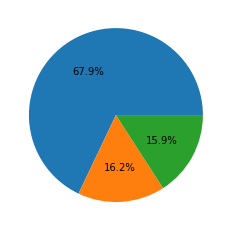

In [ ]:
#nous avons choisi l'attribut ( mode of shipment ) pour faire notre approche 
sizes = df_encoded['Mode_of_Shipment'].value_counts(sort = 1)
print(sizes)
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
df_flight = df_encoded[df_encoded['Mode_of_Shipment'] == 'Flight']
df_ship = df_encoded[df_encoded['Mode_of_Shipment'] == 'Ship']
df_road = df_encoded[df_encoded['Mode_of_Shipment'] == 'Road']

In [ ]:
df_flight.head()
#df_ship.head()
#df_road.head()

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
1377,Flight,4,3,258,2,3,1,11,2252,1,0,1,0,0,0
2473,Flight,5,1,241,4,2,0,19,2193,1,0,0,0,0,1
281,Flight,5,4,147,3,2,1,23,1132,1,0,0,0,0,1
8083,Flight,4,4,175,3,1,0,6,4600,1,0,0,0,0,1
2738,Flight,5,4,226,3,1,0,46,3149,1,1,0,0,0,0


In [ ]:
df_ship.drop(['Mode_of_Shipment'], axis=1, inplace=True)
df_flight.drop(['Mode_of_Shipment'], axis=1, inplace=True)
df_road.drop(['Mode_of_Shipment'], axis=1, inplace=True)


In [ ]:
X1 = df_flight.drop("Reached.on.Time_Y.N", axis = 1)
Y1 = df_flight['Reached.on.Time_Y.N']

X2 = df_ship.drop("Reached.on.Time_Y.N", axis = 1)
Y2 = df_ship['Reached.on.Time_Y.N']

X3 = df_road.drop("Reached.on.Time_Y.N", axis = 1)
Y3 = df_road['Reached.on.Time_Y.N']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42,shuffle = True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42,shuffle = True)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42,shuffle = True)

In [ ]:
#nous avons reentraîner chaque modéle (catégorie ) et le teste et voir si sa précision dépasse celle du modéle générale ou pas 
#pour le premiéer modéle( catégorie 1=flight) 
model1=DecisionTreeClassifier()

In [ ]:
model1.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test1 = model1.predict(X_test1)

In [ ]:
#L'Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1))

Accuracy =  0.6811023622047244


In [ ]:
#nous avons essayé d'augmenté l'Accuracy , en utilisant l'Accuracy global 
param_grid = [
              {'max_depth' : list(range(2,99)),
               'criterion' :['gini', 'entropy']},
                       
                       ]

In [ ]:
optimal_params1 = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=50,
    scoring='accuracy',
    verbose=0)

In [ ]:
optimal_params1.fit(X_train1,y_train1,)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(optimal_params1.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [ ]:
model1_optimized=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [ ]:
model1_optimized.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test1_optimized = model1_optimized.predict(X_test1)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1_optimized))

Accuracy =  0.7244094488188977



***nous avons obtenue une Accuracy plus bonne que la prémiére mais moins bonne que l'Accuracy générale ***

In [ ]:
#deuxiéme catégorie (ship)
#en refaisant la même chose 
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(X_train2,y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test2 = model2.predict(X_test2)

In [ ]:
#l'Accuracy du deuxiéme modéle 
print ("Accuracy = ", metrics.accuracy_score(y_test2, prediction_test2))

Accuracy =  0.6338546458141674


In [ ]:
#tpujours , nous utilisions la validation croisée pour l'augmentée 
optimal_params2 = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=50,
    scoring='accuracy',
    verbose=0)

In [ ]:
optimal_params2.fit(X_train2,y_train2)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(optimal_params2.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [ ]:
model2_optimized=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [ ]:
model2_optimized.fit(X_train2,y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test2_optimized = model2_optimized.predict(X_test2)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test2, prediction_test2_optimized))

Accuracy =  0.7203311867525299



*** pratiquement la même chose , nous avons essayé de l'augmentée mais toujours la même chose , ca ne dépasse pas celle du modéle générale ***

*** là Nous sentons que cette colonne (mode of shipment ) , ça ne donnera pas de bonne résulat, mais quand même , nous terminerons l'autre catégorie et  nous allons voir  ***

In [ ]:
#troisiéme catégorie (road)
model3=DecisionTreeClassifier()

In [ ]:
model3.fit(X_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test3 = model3.predict(X_test3)

In [ ]:
#l'Accuracy 
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3))

Accuracy =  0.6307692307692307


In [ ]:
#validation croisée 
optimal_params3 = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=50,
    scoring='accuracy',
    verbose=0)

In [ ]:
optimal_params3.fit(X_train3,y_train3)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(optimal_params3.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [ ]:
model3_optimized=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [ ]:
model3_optimized.fit(X_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test3_optimized = model3_optimized.predict(X_test3)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3_optimized))

Accuracy =  0.7423076923076923


*** olalalala , nous sommes arrivées à ce que nous etions entraine de dire , cette colonne ne fonctionne absolument pas bien .***

***d'ou nous sommes obligées de voir avec d'autres colonne et la tester et voir quel resultat va nous donner ***

*** tous nos teste sont faits par l'algortihme Arbre de décision ***
***Nous  testons avec une autre colonne et nous allons voir ***
